### Euron AI team 2주차 예습 과제


# Lecture 2. Image Classification Pipeline

Assignment 1
- KNN
- Linear: SVM, softmax
- Two Layer Neural Network
- Image Features

## 📌 Introduce

- Python & Numpy: Important
    - *Vectorize* (tensor computation)

### Image Classification

Image Classification: A core task in Computer Vision

How we work on image classification?
- input: image
- system: fixed set of categorized label
    - 미리 정해놓은 카테고리 집합
- output: image - which category?
    - 이미지의 카테고리를 고르는 것이 컴퓨터가 하는 것.


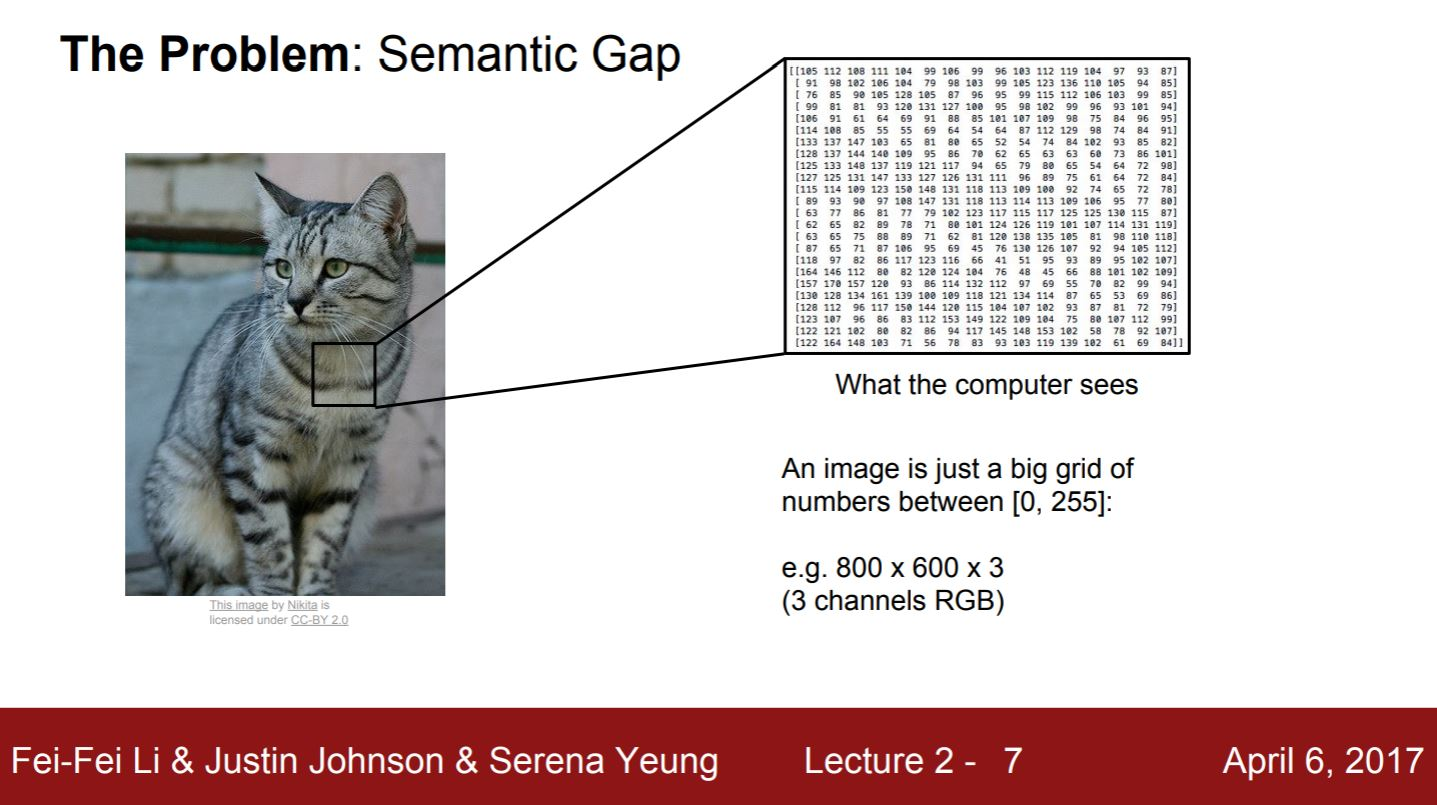

How Computer see image?
- input image → represent → number pixel
    - Image - Semantic label: Huge gap of semantic idea of cat fixel value 
        - 큰 격자 모양의 숫자 집합
    - Number Pixel: 3 number (R, G, B)
        - 각 픽셀은 3개의 숫자로 표현됨
        
        
- For computer, image is just gient array of different number
    - Gap Semantic (label <-> pixel value)


The Problem: Semantic Gap

### Challenges



- Viewpoint Variation: 바라보는 방향 (카메라)
    - Every pixel values change when the camera moves
    - But it is same cat!


- Illumination: 조명


- Deformation(position): 변형 자세


- Occlustion: 가려짐


- Backgroun Clutter: 배경과 비슷하게 생겼을 때 


- Interclass Variation: 다양성 (클래스 안에서의)


사람은 쉽게 분류해낼 수 있지만, 컴퓨터가 그러기는 쉽지 않다. 이 정도가 가능한 것이 바로 Challenging.

### Image Classifier API?

no obvious way. 

모든 종류의 데이터를 통합하는 명확한 하나의 길은 없다.

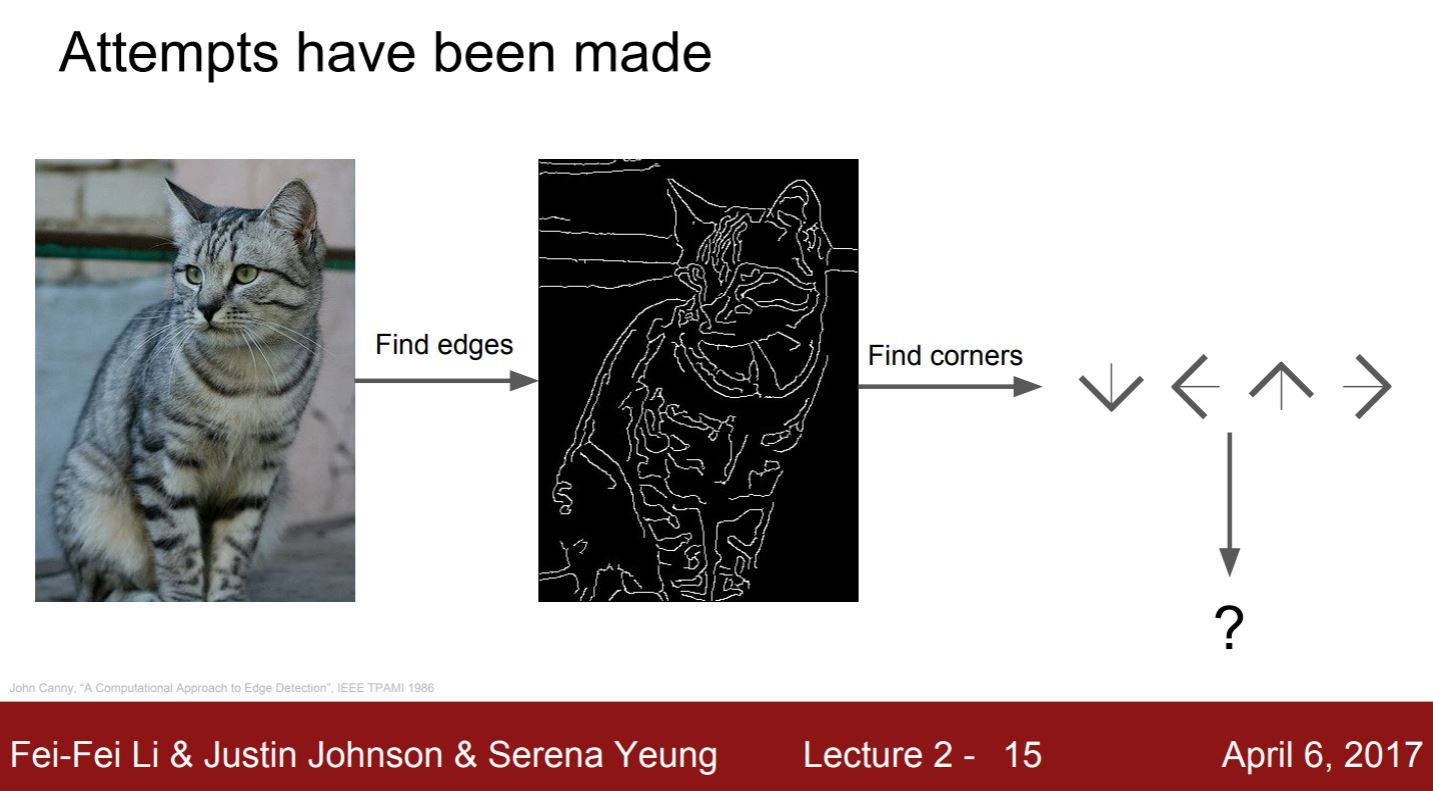

Hubel & Wisel's study: edge가 중요함을 인식.

### One Idea: make rules to recognize cat

고양이 인식을 위해 "explicit set of rules 명시적 규칙 집합" 제작


- Image → Find Edges → Find Corners → 다양한 each category로 변환 → rules


#### 단점 존재

1. Supper Brittle. 강인성 X

2. Another object category → Start all again 확장성 X
    - 다른 객체를 선택한다면 처음부터 다시 해야 됨
    
So, 다양한 것all the variety of the world에 적용되어야 함.


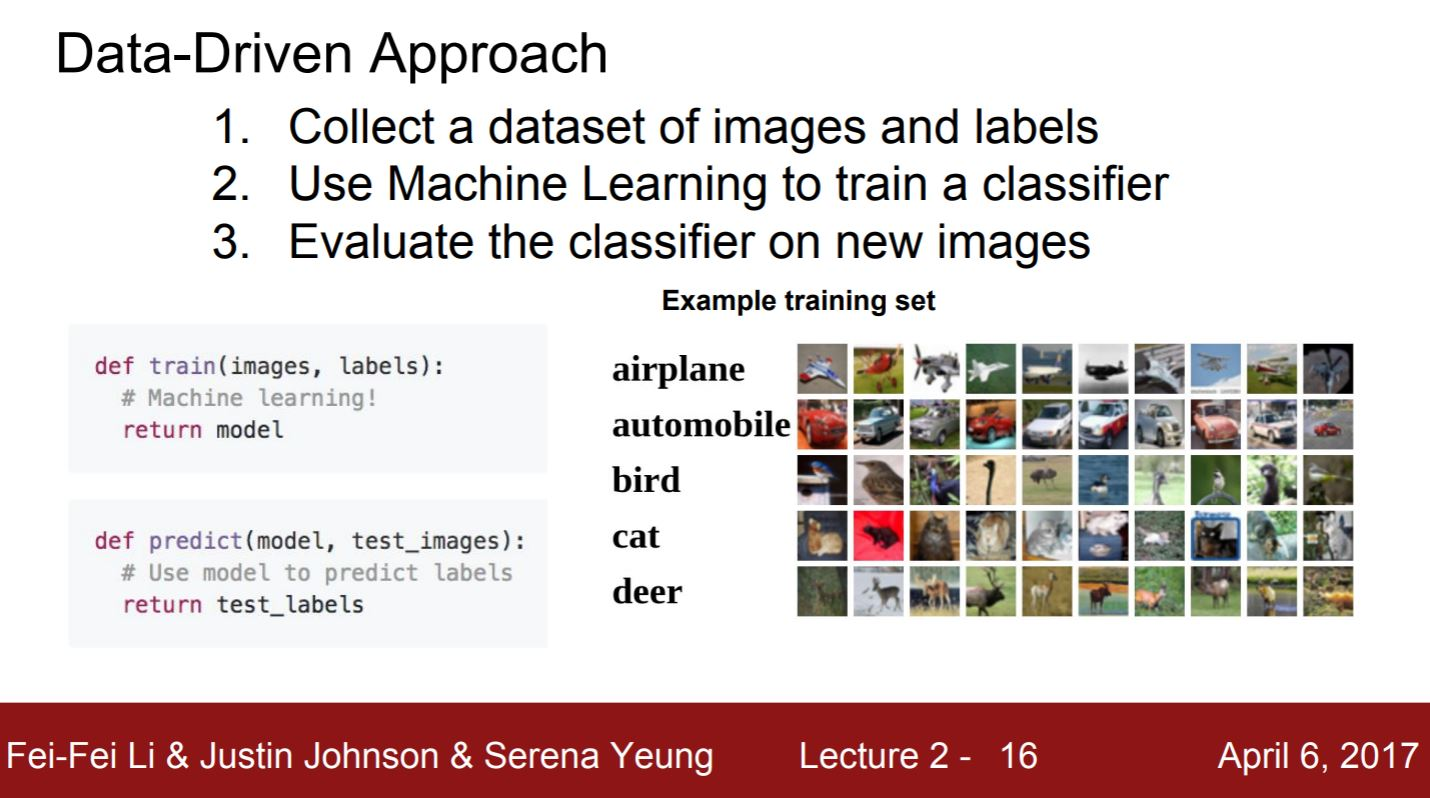

### Data-Driven Approach

손으로 직접 규칙을 써내려가는 대신, 데이터를 수집합. Collect Large Datasets

1. get (ex google image search) 
2. use ML classifier - train classifier
3. use it. try new image

- ML classifier: 데이터 요약, 다양한 객체 인식 모델 만듦

### Single Function to *Two Function*


- **Train** Funtcion

    - Input: image, label
    - Output: our model
    
    
- **Test** Function

    - Input: model
    - output: prediction value
    
    
DDA: much more general idea

# 📌 Nearest Neighbor (NN)



단순한 classifier.

Training Set과 가장 가까운 Test Example을 찾음.

성능이 탁월하지는 않지만, DDA를 설명하는 데에 좋은 예시.

- Train Set: Memorize all.
    - 아무 일도 하지 않지만, 모든 학습 데이터를 기억함.

- Test Set: Find more similar image with train.
    - 기존 학습 데이터와 새 이미지를 비교하여 제일 가까운 데이터를 찾음.
   

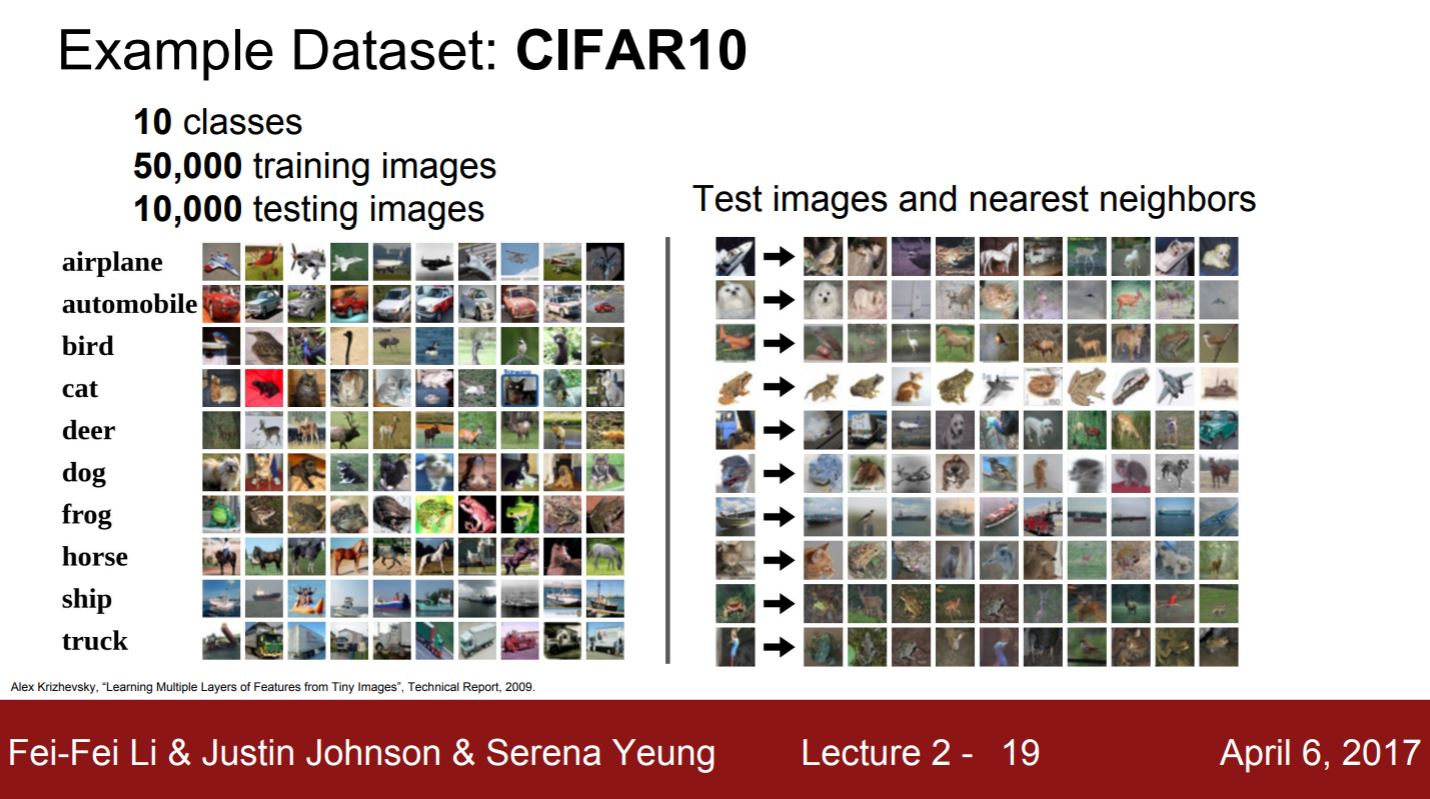

- CIFAR10: testing image

    - category 10 개
    - train image 50,000 개
    - test image 10,000 개


- test image | training image

    - training image에는 test image와 유사한 이미지를 순서대로 정렬.


- 카테고리가 정확히 분류되지는 않았지만, 육안으로 보기에도 비슷한 사진들임.

### Distance Metic to Compare Images - *L1* distance

"어떤 비교함수를 사용할지"에 대한 문제 대두.

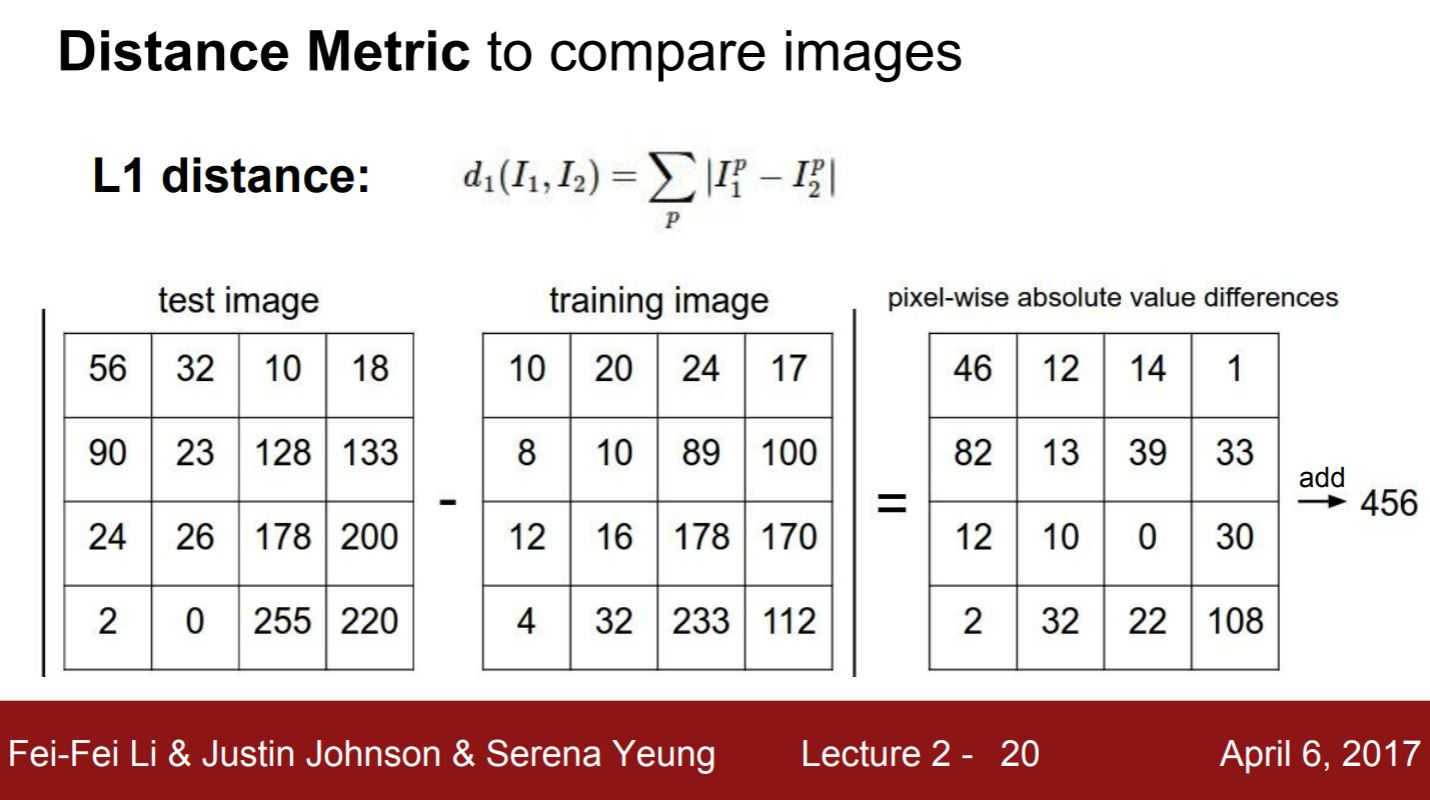

L1 Distance (Manhatten Distance)

- image를 pixel-wise로 비교
    
    - compare individual pixels of each image
    

- Train: 단순히 train 데이터를 기억함
- Test: 이미지를 입력받고, L1 Distance로 비교
    - 유사 이미지를 찾아냄.


- 구현 코드는 1~2줄로 가능함

    - numpy vectorization operations 사용

- Q: With N examples, how *fast* are training and prediction?

    - Train: O(1)

    - Test: O(N)
        - 모든 train data와 전부 비교하기 때문.


- 사람들이 일반적으로 원하는 속도와 반대임.

    - Fast Predic, Low Training 원함
    - reverse of CNN..

### What does this look like?

dicision regions

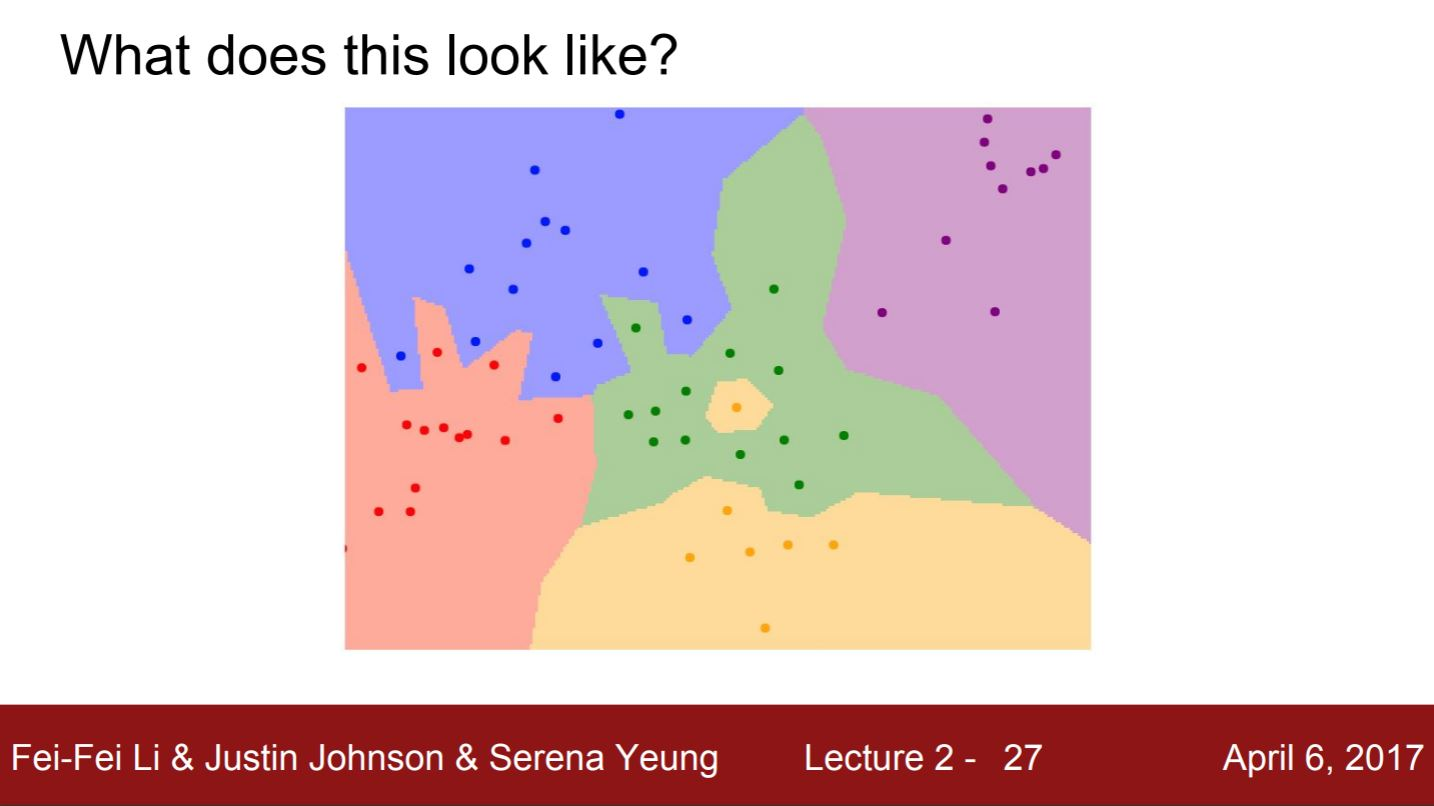

- 각 점: 학습 데이터

    - color of the point is category of the label of the point
    
 
- Each Pixel: What is the Nearest example?

    - color of backgrount corresponding what it is
    - 공간을 나누어 각 레이블로 분류함.
    - 가장 가까운 색의 점으로 공간이 칠해짐.
    
    
#### 문제 발생 - Noisy, Spurious

1. 초록색 배경 안의 노란색 점
    - 초록색이어야 한다.
    
2. 초록색 영역이 파란색 영역 침범함

**K-NN 알고리즘** 탄생: 더 일반화된 버전임.

### K-NN

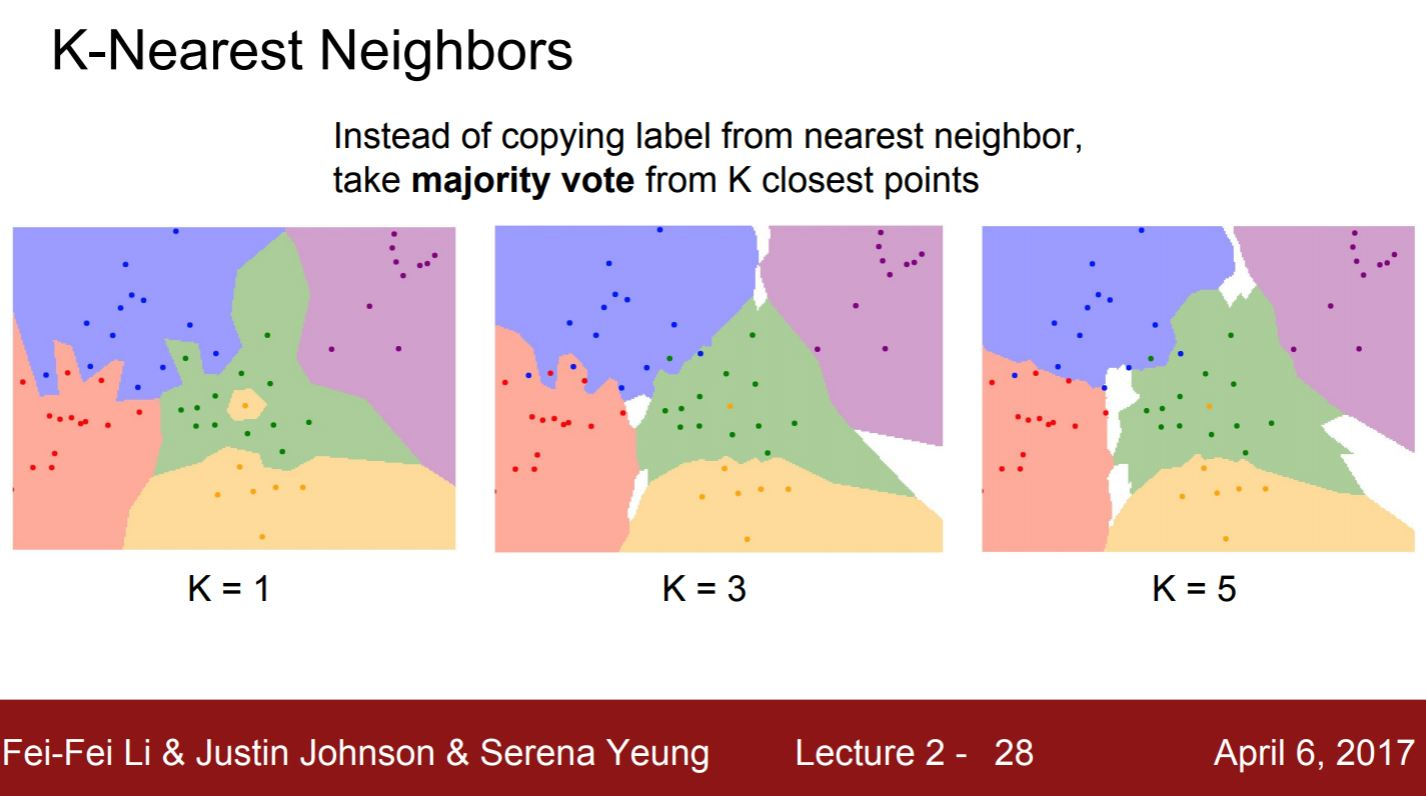

- k > 1

    - 결정 경계 부드러워지고 좋은 결과 보임


- Distance metric 이용 - 가장 가까운 이웃 K개 만큼 찾고, 이웃끼리 투표함.

    - 여러 방법 있으나 득표수 고려하는 방법이 가장 나음
    
    
- k == 3: 1. 노란 지역 사라짐 / 파-빨 경계 부드러워짐


- k == 5: 파-빨 경계 더 부드러워짐


- 이미지를 고차원 공간에 존재하는 하나의 점이라고 생각

    - high dimension image pixel-vector
    
    - 이미지 문제에서의 KNN: X

KNN 사용 시의 결정 사항: 서로 다른 점들을 어떻게 비교할 것인가?

### Distance Metic to Compare Images - L2 distance

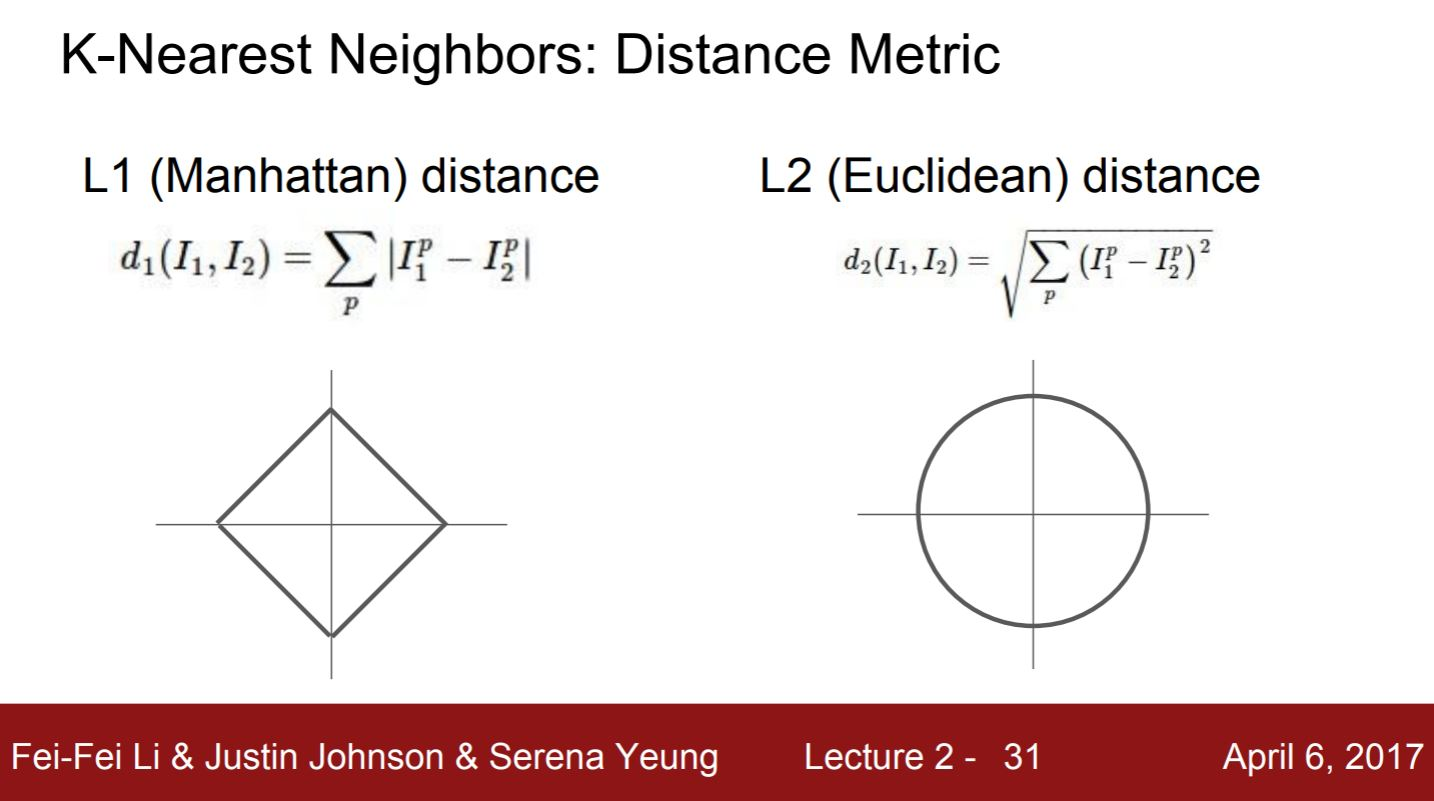

- L1: square sample

    - 사각형: L1 관점에서는 원
    - 원점에서 동일한 거리로부터 떨어져 있음

    - **Cordinate Frame**에 영향을 받음
        - 어떤 좌표 시스템이냐에 따라 영향
        - 특징 벡터의 각 요소들이 개별적 의미 가지고 있다면 L1 every vector has meanings
        
    - "좌표축"에 영향을 받음
        
        
- L2: Euclidean distance

    - 좌표계와 아무 연관 없음
        - 특징 벡터가 일반적 벡터
        - 요소들 간 실질적 의미 모름
        - -> L2
        
    - "좌표축"에 영향을 받지 않음
        - 경계가 더 자연스러움
        
        
- KNN: 어떤 거리 척도를 사용할지만 정하면, 어떤 종류의 데이터라도 다룰 수 있음.

    - 어떤 거리 척도를 사용하느냐에 따라 결정 경계의 모양 자체 달라짐
   


### Setting Hyperparameters

- 내 문제와 내 데이터에 알맞는 모델 찾기


- K, 거리 척도: hyper parameter


- no way to learn directly

    - your data에 depend해서 결정해야 함 problem dependent함.
    
    - 대부분 try different value & just figure out what is better.

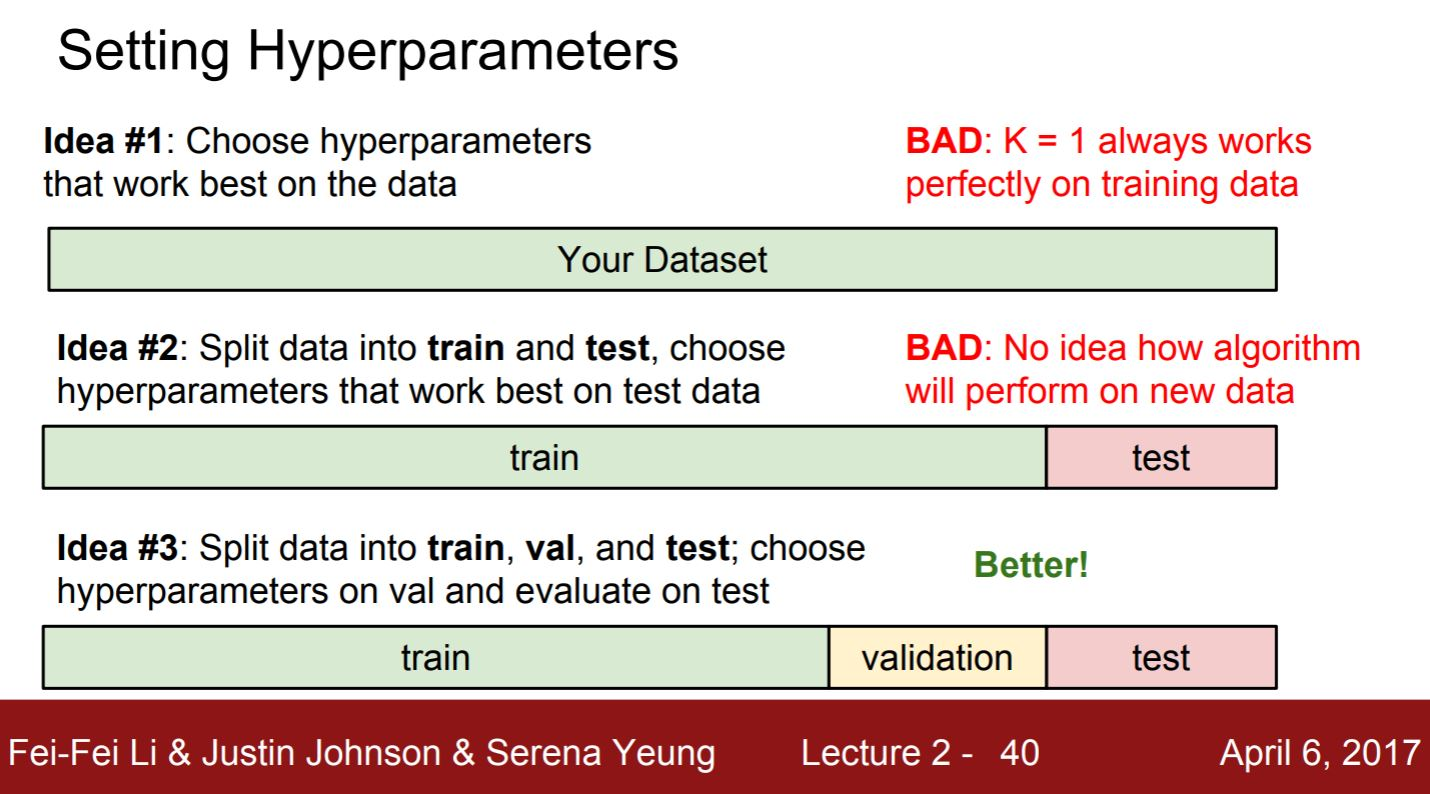

#### 1. Simply Choose Work Best

- terrible


- only pick k=1 in NN

    - 하지만 k를 더 큰 값으로 설정하는 것이 더 좋은 성능 가질 수 있음
    
    - In ML, we only care about perform **unseen data**
    
        - 학습 데이터를 얼마나 잘 맞추느냐는 중요하지 않음 (overfitting)
        

- 학습 데이터에만 신경 쓰는 것은 최악

#### 2. Train & Test data

- terrible


- we want to know **unseen data**


- 그저 테스트 셋에서만 잘 동작하는 하이퍼 파라미터 선택 가능 (overfitting)

#### 3. Train & Test & *Validation* Set

- 일반적. good


- 하이퍼 파라미터로 training set 학습시킴


- validation set에서 검증

    - 가장 성능 좋은 것 선택
    

- test set에서는 한 번만 수행

    - validation set에서 선택한 parameter으로 수행


- 세 set 엄격하게 분리해야 함

Q. Validation - Training Set

- Train set: 레이블 기억 O

- Validation set: 레이블 기억 X


- test-train data random하게 섞어서 설정하기

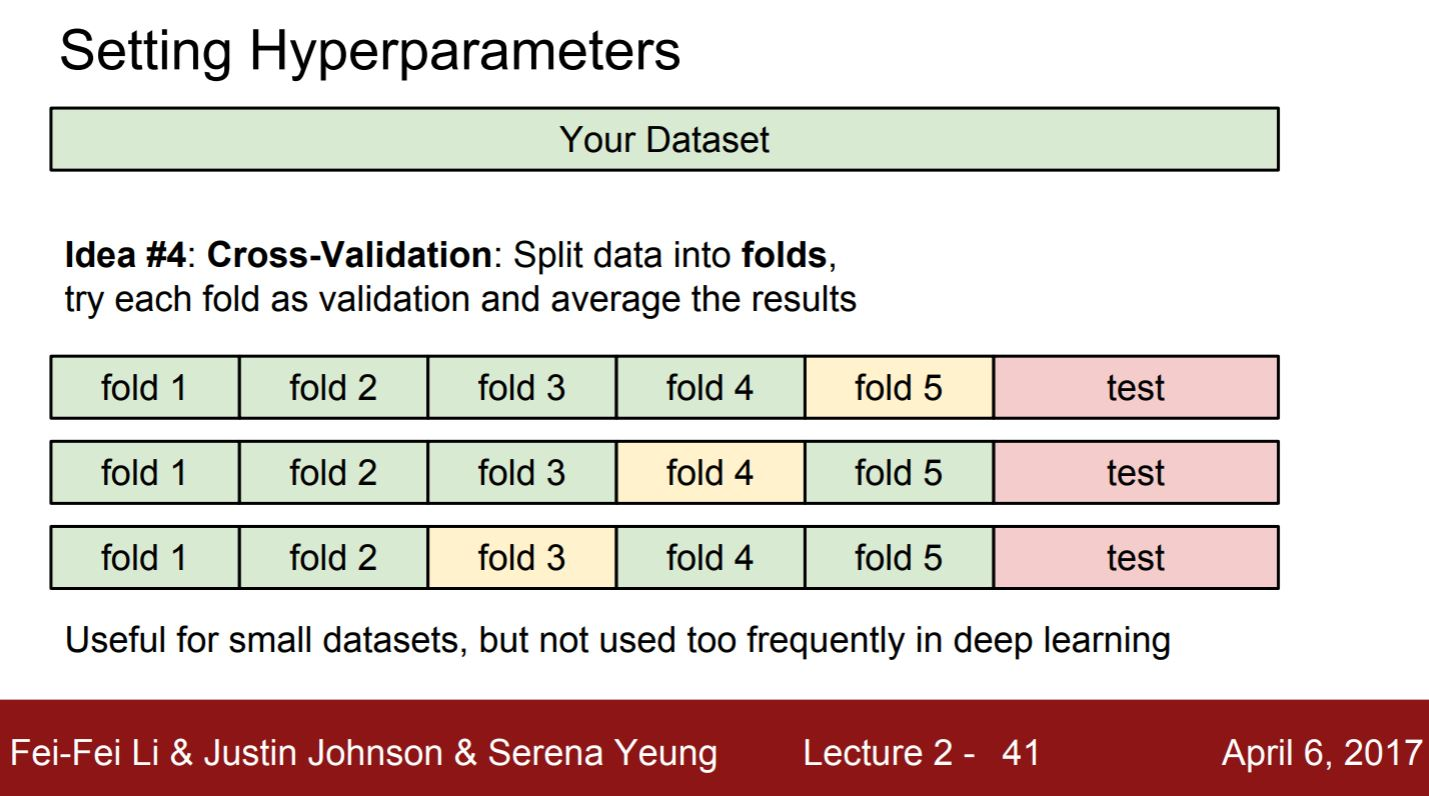

#### 4. Cross-Validation

this set is about 5-fold cross validation


- 4개의 fold에서 하이퍼 파라미터 학습 / 남은 1개의 fold에서 알고리즘 평가 - cycle through the folds

    - training - validation으로 나누어 놓음

    - training data를 여러 부분으로 나눔

    - validation set 번갈아 지정
    

- DL(큰 모델)에서는 사용하지 않음

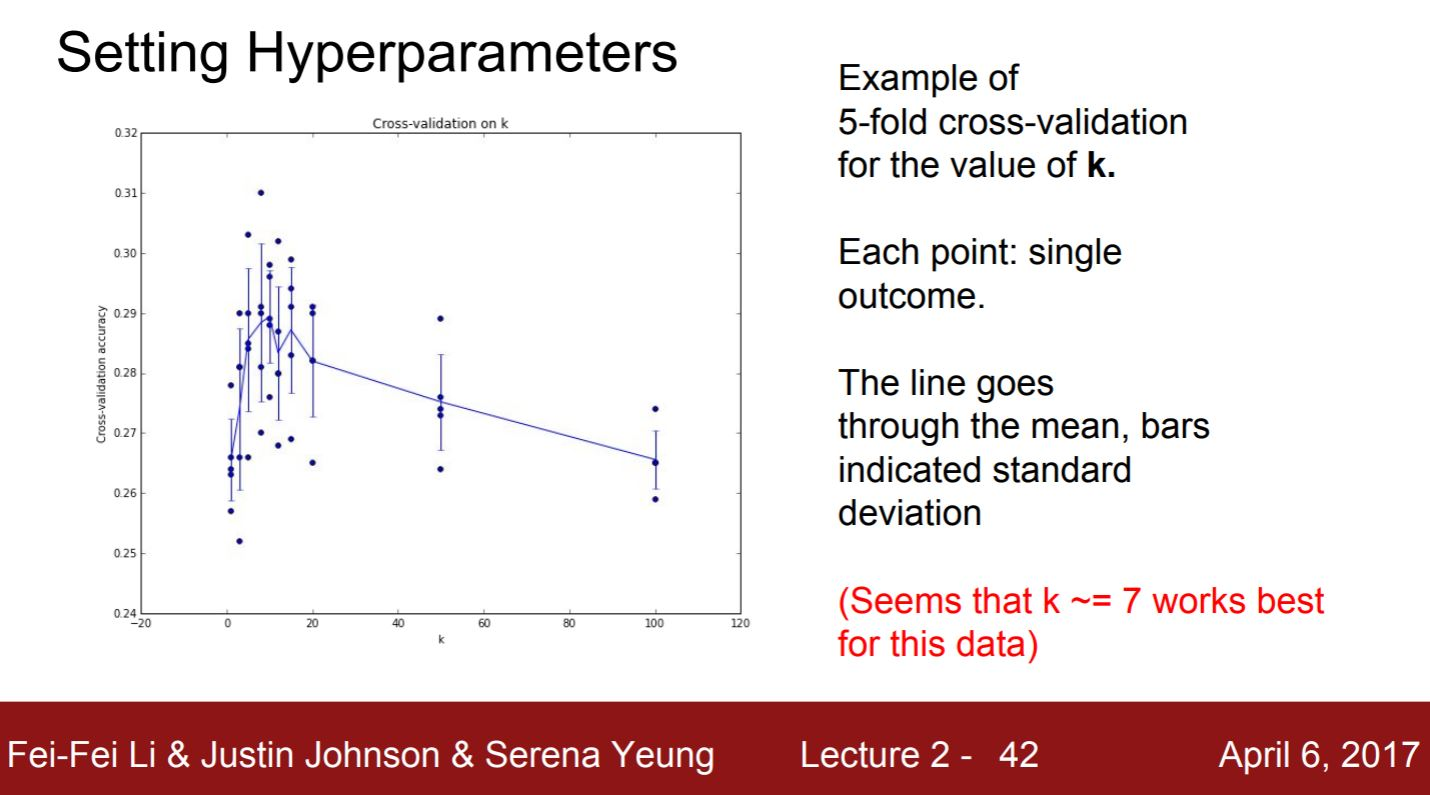

Cross Validation 수행 후 그래프

- X: K-NN의 K

- Y: Accuracy


- validation set의 성능이 최대인 하이퍼 파라미터 선택
    - 이 예제에서는 k = 7

### KNN - Image

절대 이용되지 않음


1. 느림


2. L1/L2 distance - 이미지 간의 거리 측정 적합하지 않음 not good of similary difference of images.

    - 모두 서로 다른 데이터이지만 L2 distance가 똑같을 수 있음
    
    - 실제로 이미지 간 유사도 제대로 포착 불가
    

3. Curse of Dimensionality

    - KNN: 공간 분할
    
        - 충분한 샘플 필요 (manifold 가정 x)
        
            - 차원 증가함에 따라 기하급수적으로 증가
            
    - 고차원 이미지: 데이터 수집 현실적 불가능

# 📌 Linear Classifier

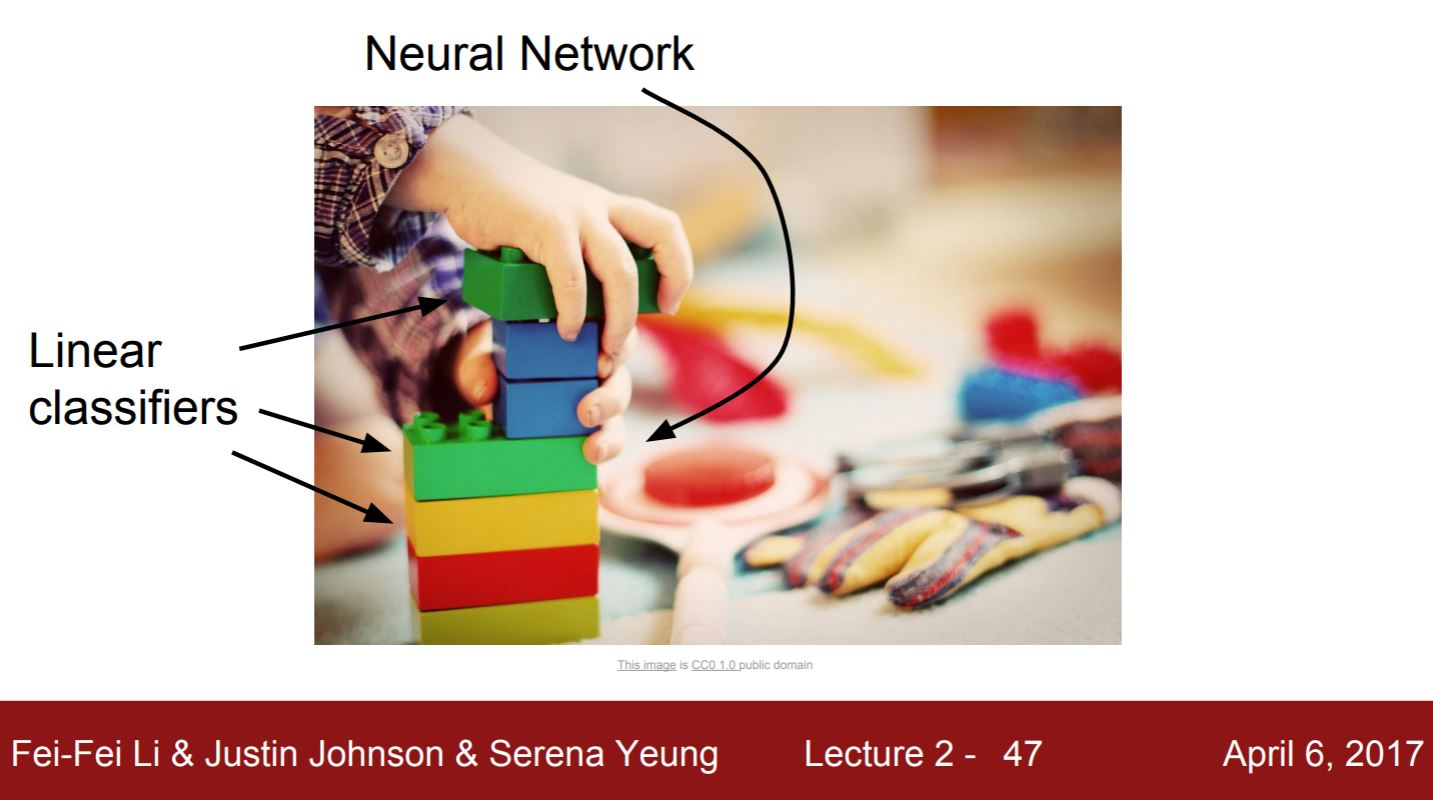

Simple Learning Algorithm

Super important (NN, CNN의 기반)

- like Lego Block

    - component together to tower CNN.
    
    - one of the basic blocks: Linear Classification
    
    

- ex) input image -> output sentense

    - 2 together (CNN + RNN)
        
        - end up with good system

### Parametic Approach

linear classification: KNN과 달리 parmetic approach 채택

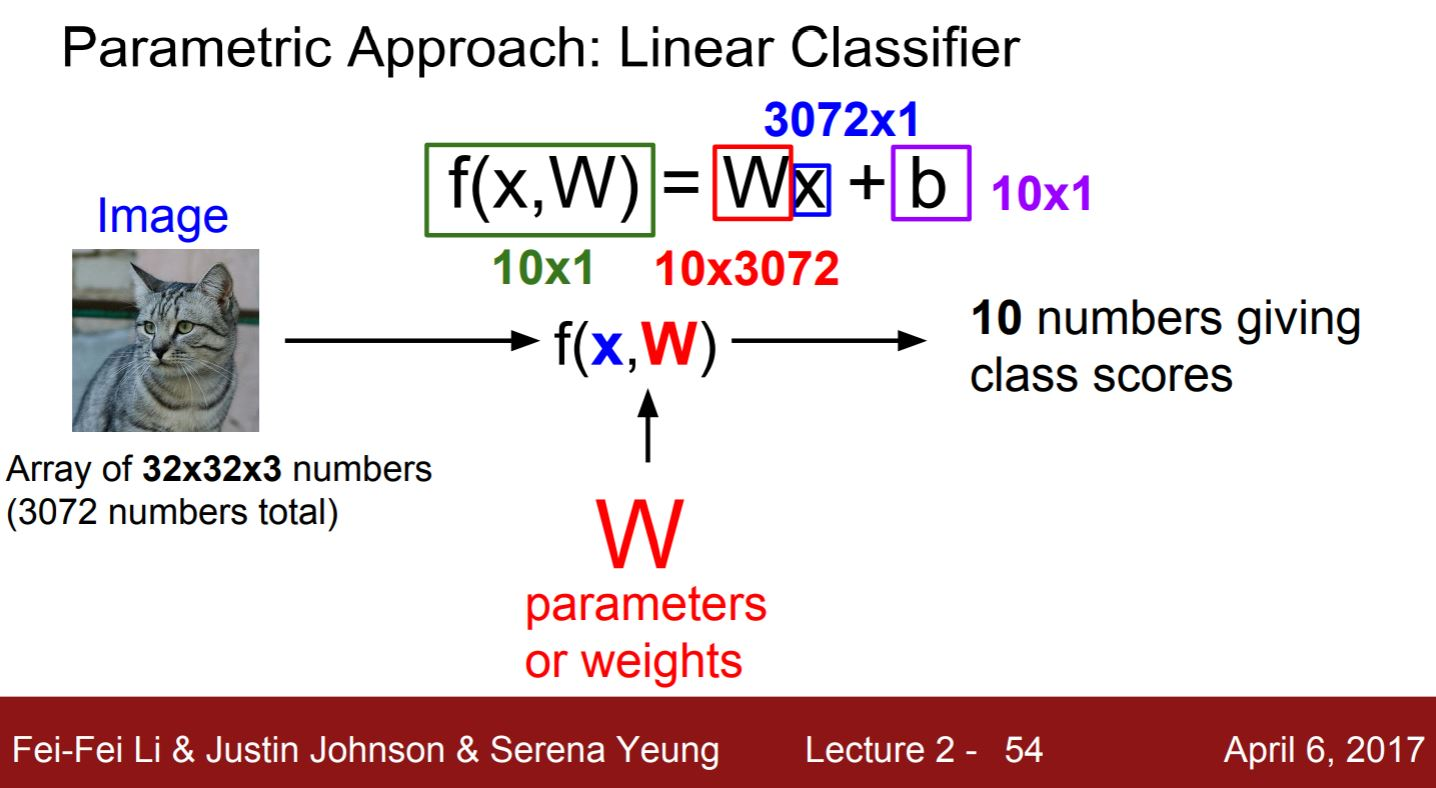

- *Permatic Model* : $f(x, W)$

    - $x$: input 
    
    - $W$: parameter weight
    
    
- output: 10 numbers

    - 고양이의 스코어가 높음: 고양이일 확률이 큼
    
    
- Vs KNN

    - KNN: parameter X
    
    - KNN: 전체 train set, 모든 train set - test time에 적용
    
        - parametic approach: train data 정보 요약
        
        - 요악 정보 W에 모음
        
            - test time에 training data 필요하지 않음
            
            - no longer need test time, we only need parameter $W$.

- only need parameter $W$ -> more apperable

    - 함수 $F$의 구조를 잘 설계하는 일: DL
    
    - NN 아키텍처 설계: 어떤 식으로 $W$와 데이터 조합할지 고려하는 것

$$ f(x, W) = Wx $$

- 조합 가장 쉬운 방법

    - Linear Classification임

- multiply output single column vector



Bias Term $b$ 넣어 주기도 함

$$ f(x, W) = Wx + b $$

- $b$: not interact with training data

- 데이터와 무관, 특정 클래스에 우선권 보유

    - if dataset is unbalance.
    
    - ex) cat의 number가 big -> $b$ of cat higher than other one

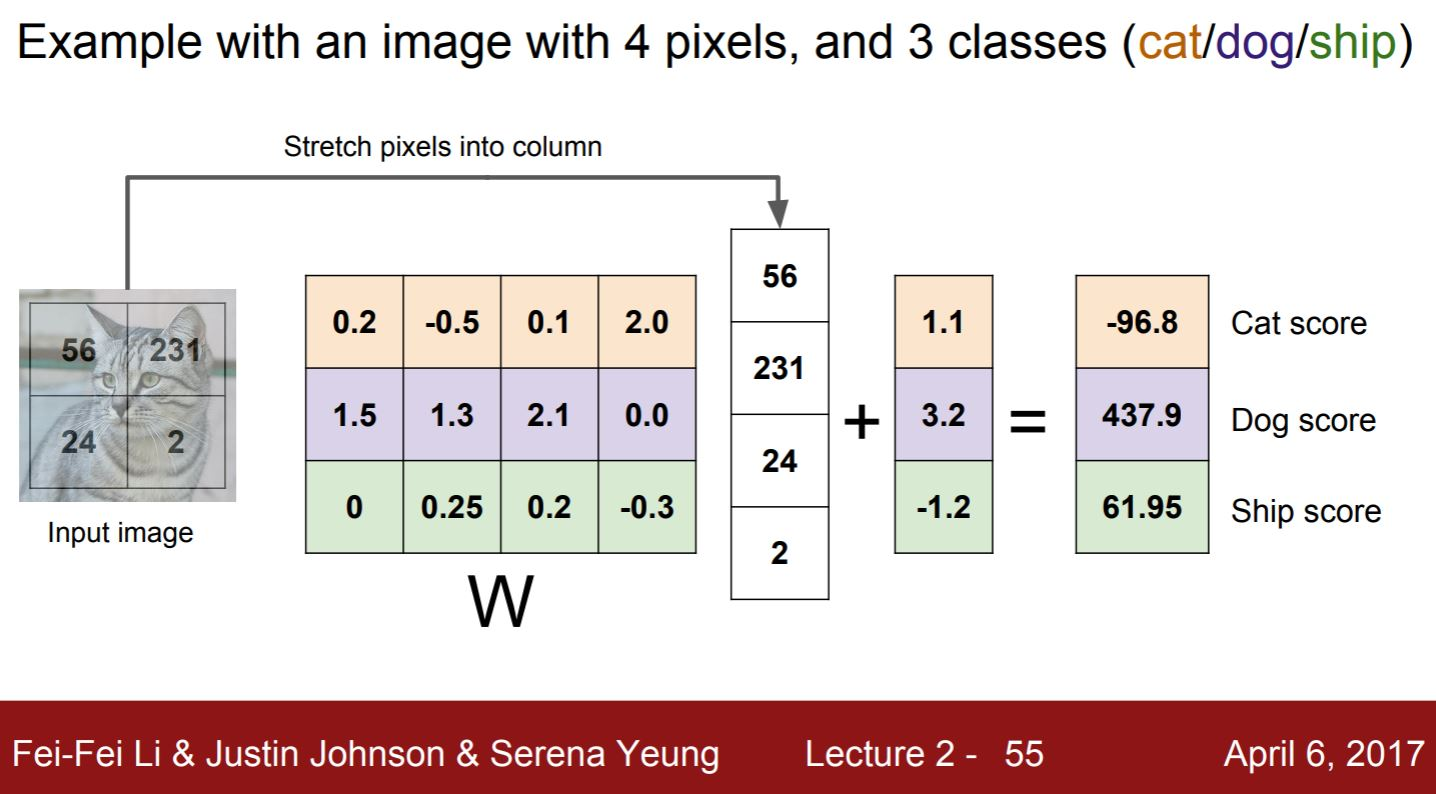

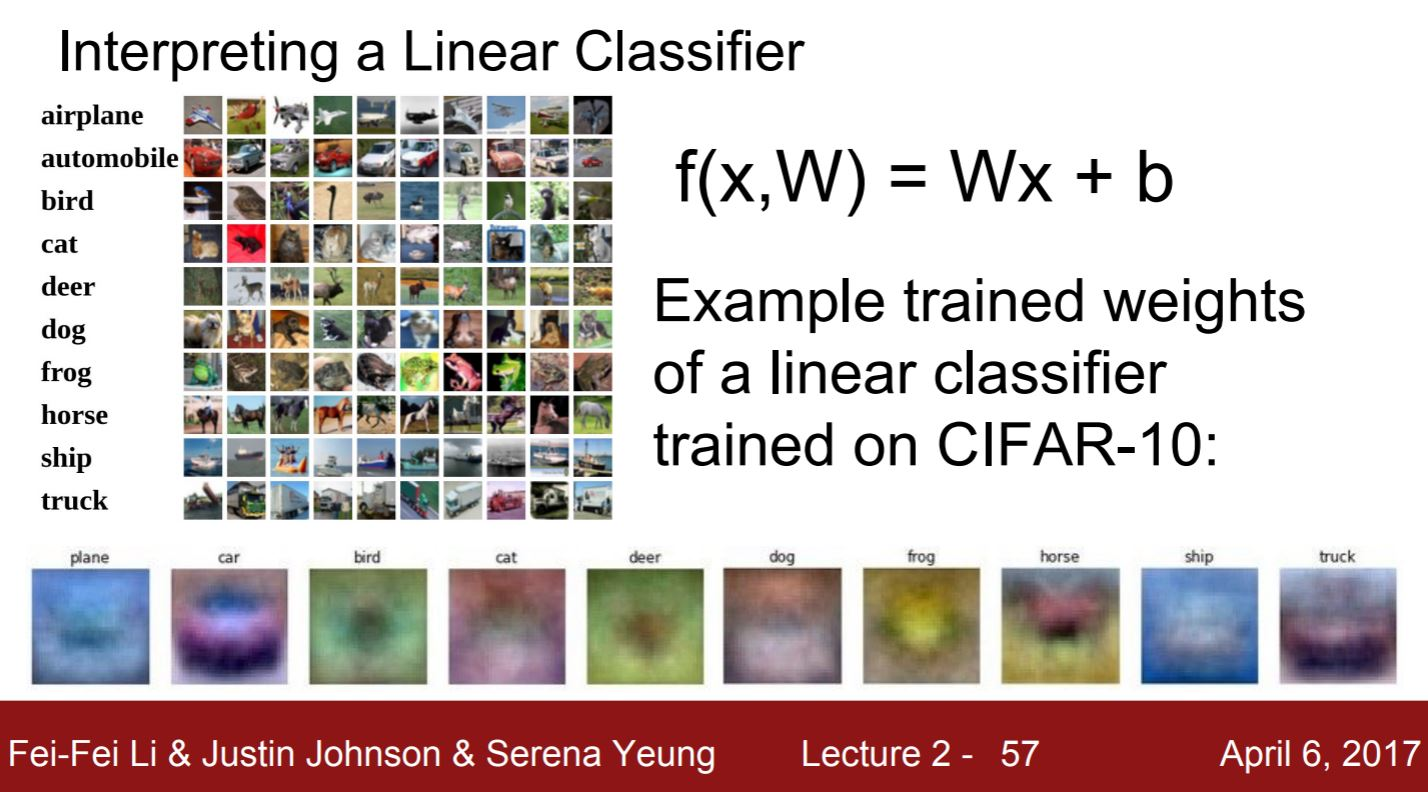

#### Linear classifier Problem:

- Train 1 Class Just 1 Tamplate

    - 한 클래스 내의 다양한 특징 존재할 수 있음
    
        - 모든 것을 평균화 -> 단 하나의 템플릿만으로 카테고리 인식
        
        
- 복잡한 모델 like NN

    - 정확도 높은 결과 가능

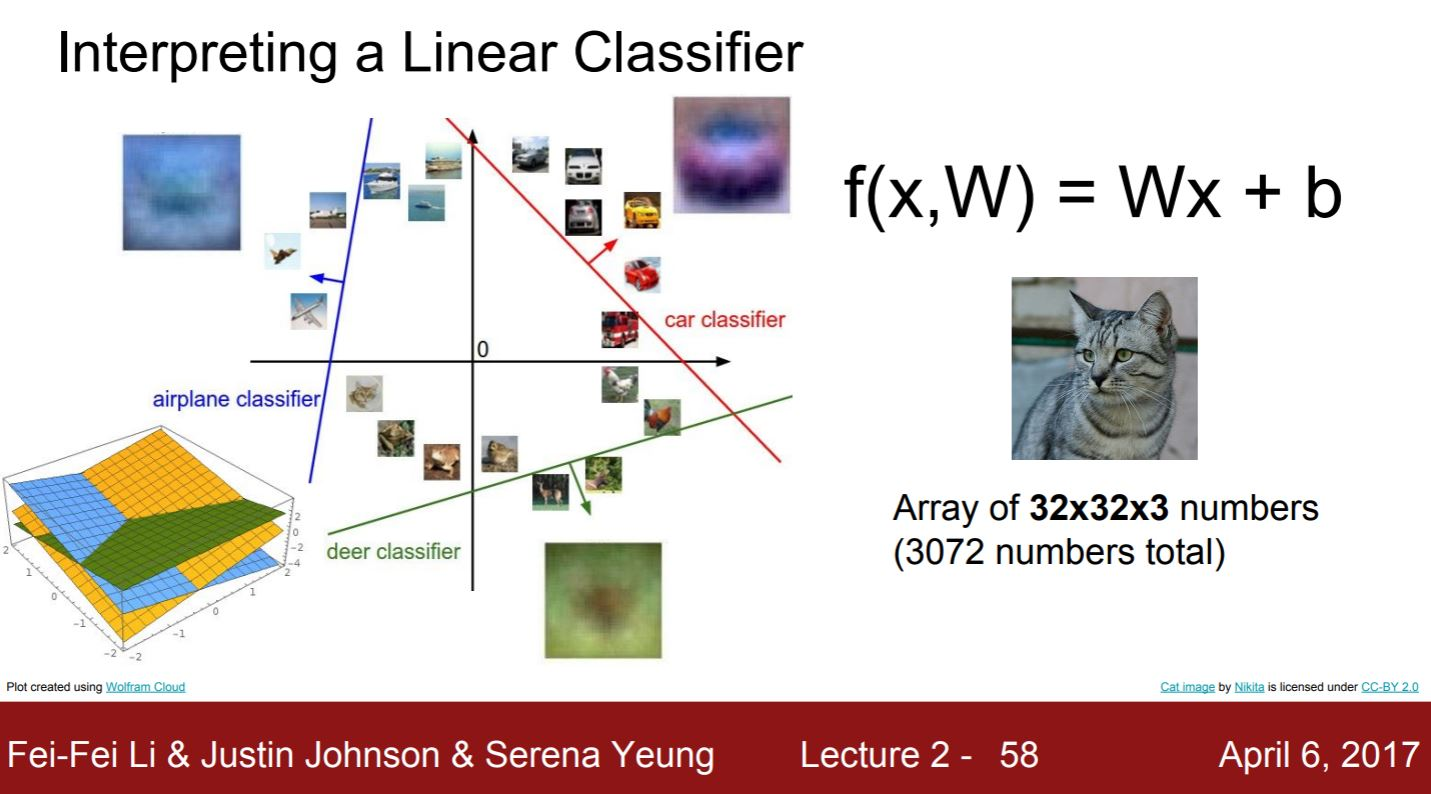

if 이미지 -> 고차원 공간의 한 점으로 해석

- Linear Classifier: 각 클래스 구분시켜 주는 선형 결정 경계

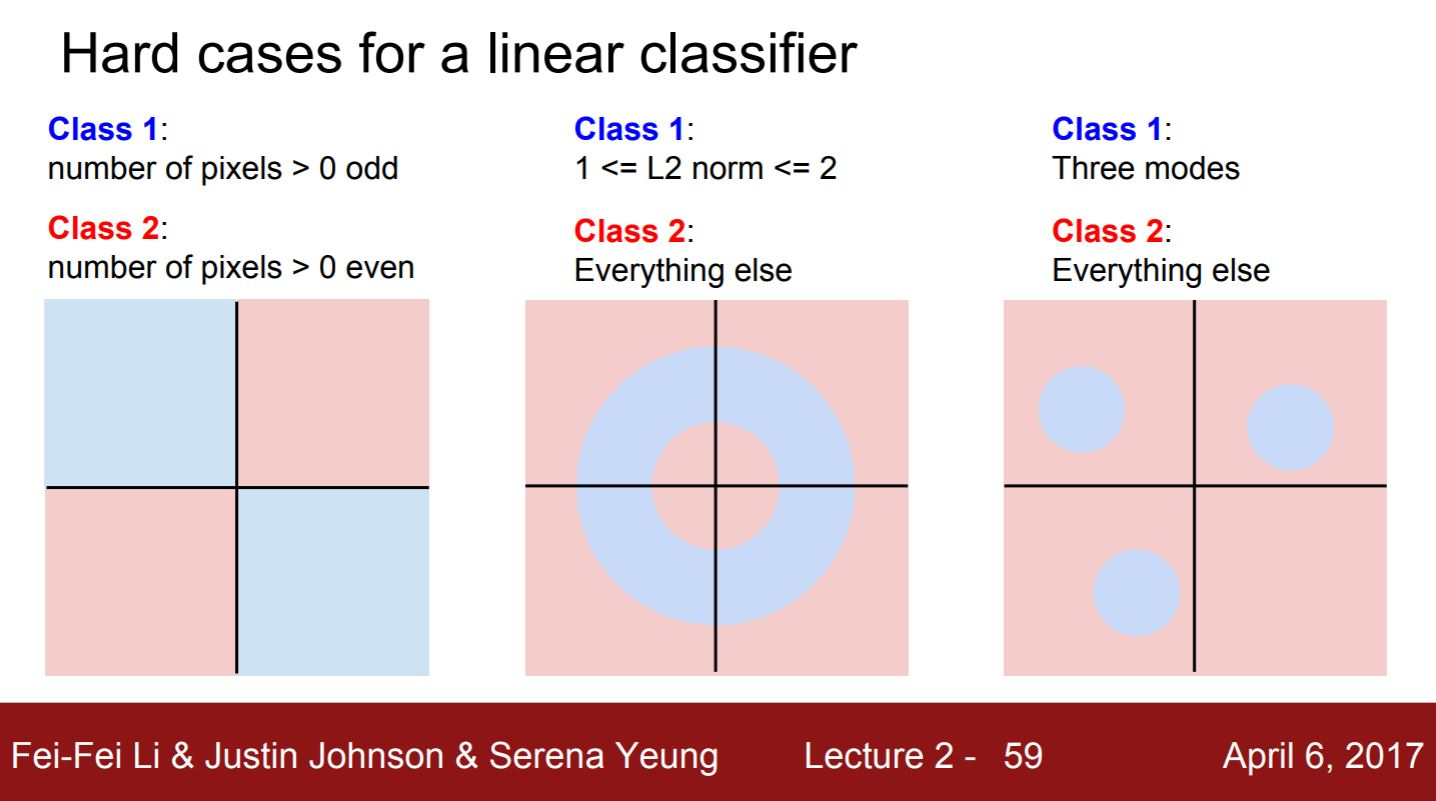

#### 문제점:

- 윗 예제처럼 두 개의 class data 가진 data set

    - 선 하나로 분류할 수 있는 방법 없음
    
    - 섬이 두 개인데 선을 하나만 긋는 것: bad
    

- Parity Problem 풀기 힘듦


- Multimodal Probelm 풀기 힘듦

    - 세 개의 파란섬 + 나머지 빨간색
    
    - 위 horse 예시
    

- Multimodal Data 풀기 힘듦

    - 한 클래스 다양한 공간 분포 가능